## Function Description
Detect likely contamination sources in a two-dimensional area, such as a radiation field, where only proximity yields a non-zero reading. The system uses Bayesian optimisation to tune detection parameters and reliably identify both strong and weak sources.

## Load and Prepare Data

In [19]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from scipy.stats.qmc import Sobol
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# Load original dataset
X = np.load("../data/function_1/initial_inputs.npy")
y = np.load("../data/function_1/initial_outputs.npy")

print(f"original n: {len(X)}")
print()

# week 1 = initial

# week 2
x_new = np.array([[0.706068, 0.768576]])
y_new = np.array([-2.441641807142239e-18])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 3
x_new = np.array([[0.203671, 0.511850]])
y_new = np.array([1.5538323767394624e-39])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 4
x_new = np.array([0.891207, 0.334068])
y_new = np.array([-4.2128659507519294e-109])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 5
x_new = np.array([[0.524498, 0.004779]])
y_new = np.array([3.0328578538936035e-129])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 6
x_new = np.array([[0.363714, 0.958879]])
y_new = np.array([-1.7203783892975783e-125])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 7
x_new = np.array([[0.186838, 0.206152]])
y_new = np.array([2.3633532812307764e-71])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 8
x_new = np.array([[0.785784, 0.576143]])
y_new = np.array([-8.169270223330268e-20])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 9
x_new = np.array([[0.277375, 0.999995]])
y_new = np.array([-3.2378602706827864e-183])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 10
x_new = np.array([[0.370952, 0.457626]])
y_new = np.array([-0.00011204007418996846])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 11
x_new = np.array([[0.748447, 0.815760]])
y_new = np.array([2.6927813559050757e-36])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 12
x_new = np.array([[0.737325, 0.368687]])
y_new = np.array([2.873175724899015e-56])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 13
x_new = np.array([[0.007598, 0.862826]])
y_new = np.array([-1.0083675769914763e-255])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# final submission
x_new = np.array([[0.879734, 0.041528]])
y_new = np.array([-4.391565633480054e-247])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))


print("X:\n", X)
print()
print("y:\n", y)
print()
print("n: ", len(y))
print()
idx_best = np.argmax(y)
print(f"current maximum:\nn: {idx_best+1}\ny: {y[idx_best]}\nX: {X[idx_best]}")

original n: 10

X:
 [[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]
 [0.706068   0.768576  ]
 [0.203671   0.51185   ]
 [0.891207   0.334068  ]
 [0.524498   0.004779  ]
 [0.363714   0.958879  ]
 [0.186838   0.206152  ]
 [0.785784   0.576143  ]
 [0.277375   0.999995  ]
 [0.370952   0.457626  ]
 [0.748447   0.81576   ]
 [0.737325   0.368687  ]
 [0.007598   0.862826  ]
 [0.879734   0.041528  ]]

y:
 [ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048 -2.44164181e-018  1.55383238e-039
 -4.21286595e-109  3.03285785e-129 -1.72037839e-125  2.36335328e-071
 -8.16927022e-020 -3.23786027e-183 -1.12040074e-004  2.69278136e-036
  2.87317572e-056 -1.00836758e-255 -4.39156563e-247]



## Visualisation

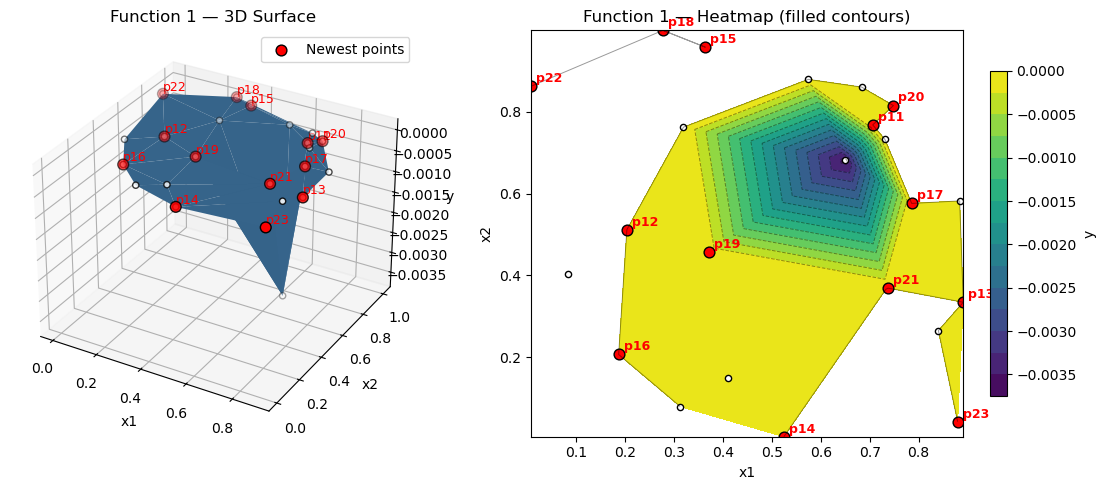

In [20]:
def plot_2d_to_1d(X, y, title_prefix="", n_new=2):
    """
    Plots a 3D trisurf and 2D heatmap of a 2D -> 1D function.
    Labels only the newest n_new points (e.g. p14, p15).
    """
    # Ensure correct shape
    X = np.atleast_2d(X)
    y = np.ravel(y)
    x1, x2 = X[:, 0], X[:, 1]
    n = len(y)

    # Index and labels for newest points
    newest_idx = np.arange(max(0, n - n_new), n)
    labels = [f"p{i+1}" for i in newest_idx]

    # ---------- Figure ----------
    fig = plt.figure(figsize=(12, 5))

    # --- Left: 3D surface ---
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_trisurf(x1, x2, y, color='steelblue', alpha=1.0)
    ax1.scatter(x1, x2, y, s=20, color='white', edgecolor='black')
    ax1.scatter(x1[newest_idx], x2[newest_idx], y[newest_idx],
                s=60, color='red', edgecolor='black', label='Newest points')

    # Label only newest points
    z_offset = 0.02 * (np.ptp(y) if np.ptp(y) > 0 else 1.0)
    for i, lbl in zip(newest_idx, labels):
        ax1.text(x1[i], x2[i], y[i] + z_offset, lbl, fontsize=9, color='red')

    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_zlabel("y")
    ax1.set_title(f"{title_prefix} — 3D Surface")
    ax1.legend()

    # --- Right: 2D heatmap ---
    ax2 = fig.add_subplot(1, 2, 2)
    cntr = ax2.tricontourf(x1, x2, y, levels=14, cmap='viridis')
    ax2.tricontour(x1, x2, y, levels=14, linewidths=0.7, colors='black', alpha=0.4)
    ax2.scatter(x1, x2, s=20, color='white', edgecolor='black')
    ax2.scatter(x1[newest_idx], x2[newest_idx], s=60, color='red', edgecolor='black')

    # Label only newest points
    for i, lbl in zip(newest_idx, labels):
        ax2.annotate(lbl, xy=(x1[i], x2[i]),
                     xytext=(x1[i] + 0.01, x2[i] + 0.01),
                     fontsize=9, color='red', weight='bold')

    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_title(f"{title_prefix} — Heatmap (filled contours)")
    fig.colorbar(cntr, ax=ax2, shrink=0.8, label="y")

    plt.tight_layout()
    plt.show()


plot_2d_to_1d(X, y, "Function 1", n_new=13)   # 13 new data points

## Bayesian Optimisation

In [21]:
# GP setup
kernel = (ConstantKernel(1.0, (1e-2, 1e2)) *
          Matern(length_scale=np.ones(X.shape[1]), nu=1.5) +
          WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-6, 1e-1)))

# Fit GP
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=5,
                              normalize_y=True,
                              random_state=41)
gp.fit(X, y)

# Candidates inside [0,1]^d using Sobol sequence

d = X.shape[1]  # dimension
sobol = Sobol(d=d, scramble=True, seed=None)
X_candidates = sobol.random_base2(m=18)

# GP predictions
mu, sigma = gp.predict(X_candidates, return_std=True)

# Upper Confidence Bound (UCB)
beta = 2.5
ucb = mu + (beta * sigma)

# Pick next query
x_next = X_candidates[np.argmax(ucb)]

print(f"Next point to query: {x_next[0]:.6f}-{x_next[1]:.6f}")

/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Next point to query: 0.962824-0.920593


## Post Analysis

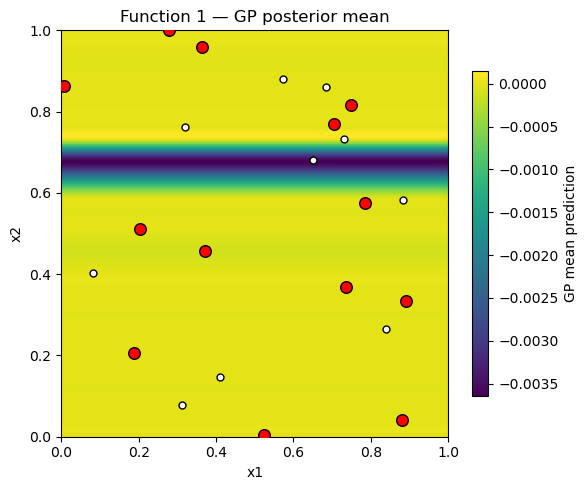

In [22]:
def plot_gp_mean_heatmap(gp, X, y, title="GP mean heatmap",
                         newest_idx=None, grid_n=200):

    X = np.atleast_2d(X)
    y = np.ravel(y)
    x1, x2 = X[:, 0], X[:, 1]

    # ---- build grid over [0,1] x [0,1] ----
    gx = np.linspace(0, 1, grid_n)
    gy = np.linspace(0, 1, grid_n)
    XX, YY = np.meshgrid(gx, gy)
    grid = np.column_stack([XX.ravel(), YY.ravel()])

    # ---- GP prediction on grid ----
    mu, _ = gp.predict(grid, return_std=True)
    MU = mu.reshape(grid_n, grid_n)

    # ---- plot ----
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(
        MU,
        origin="lower",
        extent=(0, 1, 0, 1),
        aspect="auto",
        cmap="viridis"
    )

    # scatter observed points
    ax.scatter(x1, x2, s=25, color="white", edgecolor="black", zorder=3)

    # highlight newest points if provided
    if newest_idx is not None:
        ax.scatter(
            x1[newest_idx], x2[newest_idx],
            s=70, color="red", edgecolor="black", zorder=4
        )

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)
    plt.colorbar(im, ax=ax, shrink=0.8, label="GP mean prediction")

    plt.tight_layout()
    plt.show()

n_new = 13  # 13 new data points
plot_gp_mean_heatmap(
    gp,
    X,
    y,
    title="Function 1 — GP posterior mean",
    newest_idx=np.arange(len(y) - n_new, len(y))  
)

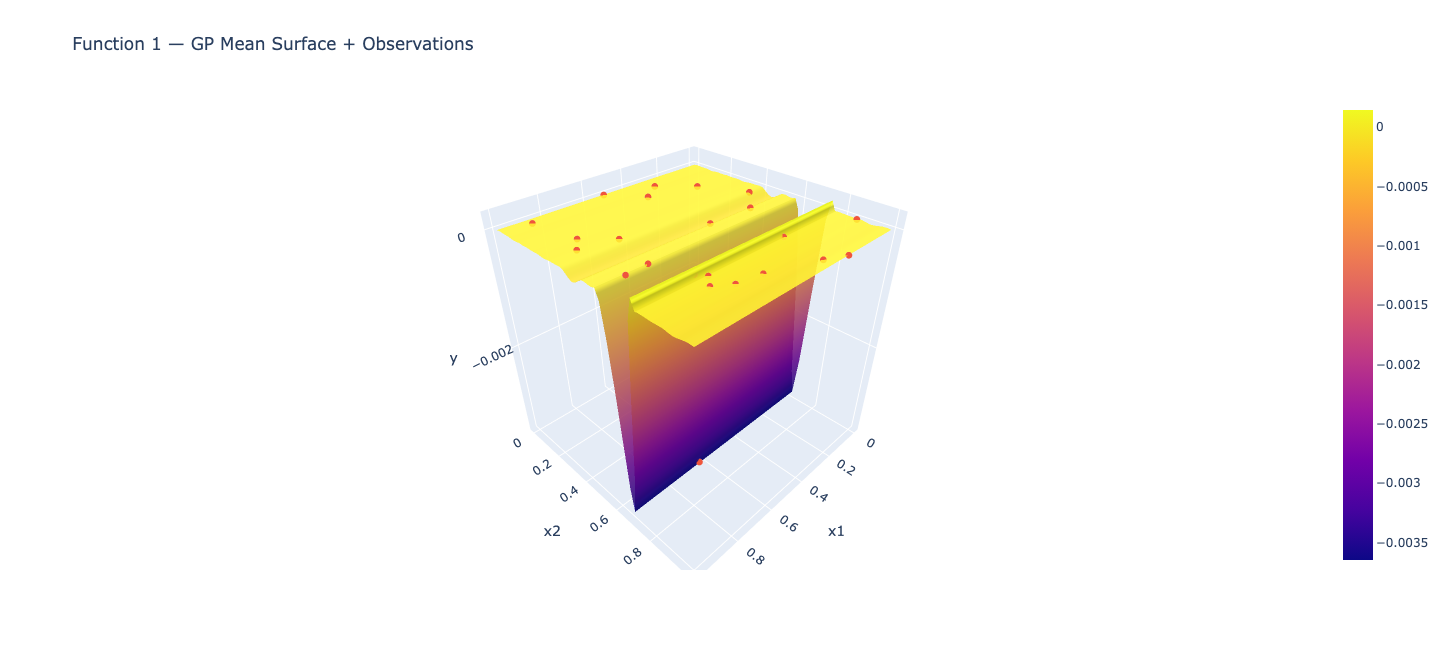

In [24]:
# Make a grid in [0,1]x[0,1]
n_grid = 60
gx = np.linspace(0, 1, n_grid)
gy = np.linspace(0, 1, n_grid)
XX, YY = np.meshgrid(gx, gy)
grid = np.column_stack([XX.ravel(), YY.ravel()])

# GP mean on grid (assumes you already fit gp)
mu = gp.predict(grid).reshape(n_grid, n_grid)

fig = go.Figure()

# Surface = GP posterior mean
fig.add_trace(go.Surface(x=XX, y=YY, z=mu, opacity=0.85))

# Scatter = observed points
fig.add_trace(go.Scatter3d(
    x=X[:,0], y=X[:,1], z=np.ravel(y),
    mode="markers",
    marker=dict(size=4),
    name="observations"
))

fig.update_layout(
    title="Function 1 — GP Mean Surface + Observations",
    scene=dict(xaxis_title="x1", yaxis_title="x2", zaxis_title="y"),
    height=650
)

fig.show()